In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os

In [15]:
# Path to your zip file
zip_path = "sensors_with_risk_2.zip"

In [16]:
# Path to extract to
extract_path = "unzipped_data"

In [17]:
# Create extraction folder if it doesn't exist
os.makedirs(extract_path, exist_ok=True)

In [18]:
# Open and extract
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [19]:
print(f"Files extracted to {extract_path}")

Files extracted to unzipped_data


In [20]:
# Path to the CSV inside the unzipped folder
csv_path = "unzipped_data/sensors_with_risk_2.csv"  # Change to actual file name

In [22]:
print(csv_path)

unzipped_data/sensors_with_risk_2.csv


In [23]:
# Load dataset
df = pd.read_csv(csv_path)

In [24]:
print(df.shape)

(4167777, 26)


In [25]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4167777 entries, 0 to 4167776
Data columns (total 26 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   timestamp                   object 
 1   uptimeNanos_lin             int64  
 2   x_lin                       float64
 3   y_lin                       float64
 4   z_lin                       float64
 5   uptimeNanos_acc             int64  
 6   x_acc                       float64
 7   y_acc                       float64
 8   z_acc                       float64
 9   uptimeNanos                 int64  
 10  x                           float64
 11  y                           float64
 12  z                           float64
 13  uptimeNanos_gyro            int64  
 14  x_gyro                      float64
 15  y_gyro                      float64
 16  z_gyro                      float64
 17  start                       object 
 18  finish                      object 
 19  firstCollectionUptime

In [26]:
df.head()

,timestamp,uptimeNanos_lin,x_lin,y_lin,z_lin,uptimeNanos_acc,x_acc,y_acc,z_acc,uptimeNanos,...,z_gyro,start,finish,firstCollectionUptimeNanos,lastCollectionUptimeNanos,elapsedTimeNanos,smartphoneModel,androidVersion,acc_magnitude,risk_level
0,14/05/2016 10:54:33,11537817349260,0.085305,-0.322752,-0.106739,11537817349260,0.085305,-0.322752,9.69991,11537628641797,...,0.029619,2016-05-15 16:03:47.304-0300,2016-05-15 16:17:16.001-0300,11200022380290,12008698803207,808676422917,XT1058,5.1,9.705653,Intermediate
1,14/05/2016 10:54:33,11537817349260,0.085305,-0.322752,-0.106739,11537817349260,0.085305,-0.322752,9.69991,11537628641797,...,0.007163,2016-05-15 16:03:47.304-0300,2016-05-15 16:17:16.001-0300,11200022380290,12008698803207,808676422917,XT1058,5.1,9.705653,Intermediate
2,14/05/2016 10:54:33,11537817349260,0.085305,-0.322752,-0.106739,11537817349260,0.085305,-0.322752,9.69991,11537628641797,...,-0.007453,2016-05-15 16:03:47.304-0300,2016-05-15 16:17:16.001-0300,11200022380290,12008698803207,808676422917,XT1058,5.1,9.705653,Intermediate
3,14/05/2016 10:54:33,11537817349260,0.085305,-0.322752,-0.106739,11537817349260,0.085305,-0.322752,9.69991,11537746877720,...,0.029619,2016-05-15 16:03:47.304-0300,2016-05-15 16:17:16.001-0300,11200022380290,12008698803207,808676422917,XT1058,5.1,9.705653,Intermediate
4,14/05/2016 10:54:33,11537817349260,0.085305,-0.322752,-0.106739,11537817349260,0.085305,-0.322752,9.69991,11537746877720,...,0.007163,2016-05-15 16:03:47.304-0300,2016-05-15 16:17:16.001-0300,11200022380290,12008698803207,808676422917,XT1058,5.1,9.705653,Intermediate


In [27]:
df.isnull().sum()

timestamp                     0
uptimeNanos_lin               0
x_lin                         0
y_lin                         0
z_lin                         0
uptimeNanos_acc               0
x_acc                         0
y_acc                         0
z_acc                         0
uptimeNanos                   0
x                             0
y                             0
z                             0
uptimeNanos_gyro              0
x_gyro                        0
y_gyro                        0
z_gyro                        0
start                         0
finish                        0
firstCollectionUptimeNanos    0
lastCollectionUptimeNanos     0
elapsedTimeNanos              0
smartphoneModel               0
androidVersion                0
acc_magnitude                 0
risk_level                    0
dtype: int64

In [28]:
df['risk_level'].value_counts()

risk_level
Intermediate    3993223
Danger           168064
Safe               6490
Name: count, dtype: int64

In [29]:
df.describe()

,uptimeNanos_lin,x_lin,y_lin,z_lin,uptimeNanos_acc,x_acc,y_acc,z_acc,uptimeNanos,x,...,z,uptimeNanos_gyro,x_gyro,y_gyro,z_gyro,firstCollectionUptimeNanos,lastCollectionUptimeNanos,elapsedTimeNanos,androidVersion,acc_magnitude
count,4.167777e+06,4.167777e+06,4.167777e+06,4.167777e+06,4.167777e+06,4.167777e+06,4.167777e+06,4.167777e+06,4.167777e+06,4.167777e+06,...,4.167777e+06,4.167777e+06,4.167777e+06,4.167777e+06,4.167777e+06,4.167777e+06,4.167777e+06,4.167777e+06,4.167777e+06,4.167777e+06
mean,1.182192e+13,-4.875156e-03,-1.163638e-02,-9.977103e-02,1.182192e+13,-4.778957e-03,-1.151820e-02,9.706791e+00,1.182192e+13,5.029840e-09,...,-1.074603e+01,1.182192e+13,2.479563e-03,-4.387431e-04,2.458751e-02,1.120002e+13,1.200870e+13,8.086764e+11,5.100000e+00,9.792867e+00
std,8.336097e+11,9.338211e-01,9.162509e-01,6.798564e-01,8.336095e+11,9.339954e-01,9.162765e-01,6.798491e-01,8.336102e+11,5.347272e-07,...,2.994748e+00,8.336095e+11,9.448592e-02,9.353183e-02,1.986432e-01,0.000000e+00,0.000000e+00,0.000000e+00,4.796164e-14,7.041417e-01
min,1.019695e+13,-1.446654e+01,-7.217427e+00,-6.789372e+00,1.019695e+13,-1.446654e+01,-7.217427e+00,3.017277e+00,1.019693e+13,-3.196299e-06,...,-2.964054e+01,1.019694e+13,-8.200636e-01,-1.067108e+00,-1.705008e+00,1.120002e+13,1.200870e+13,8.086764e+11,5.100000e+00,4.092211e+00
25%,1.137723e+13,-3.912610e-01,-3.855687e-01,-3.119234e-01,1.137723e+13,-3.912609e-01,-3.855187e-01,9.494564e+00,1.137713e+13,-2.908055e-07,...,-1.231972e+01,1.137723e+13,-3.245654e-02,-3.569366e-02,-4.093984e-02,1.120002e+13,1.200870e+13,8.086764e+11,5.100000e+00,9.550516e+00
50%,1.184149e+13,-3.995941e-03,-3.607870e-03,-1.447862e-01,1.184149e+13,-3.995931e-03,-3.607987e-03,9.661814e+00,1.184144e+13,3.725290e-09,...,-1.095782e+01,1.184149e+13,8.346879e-05,-8.300478e-05,2.922849e-03,1.120002e+13,1.200870e+13,8.086764e+11,5.100000e+00,9.692339e+00
75%,1.244426e+13,3.577127e-01,3.815933e-01,1.099568e-01,1.244426e+13,3.577127e-01,3.816611e-01,9.916418e+00,1.244425e+13,3.054738e-07,...,-9.366316e+00,1.244427e+13,3.507741e-02,3.397806e-02,5.585431e-02,1.120002e+13,1.200870e+13,8.086764e+11,5.100000e+00,9.981665e+00
max,1.329899e+13,9.186070e+00,1.553756e+01,8.312416e+00,1.329899e+13,9.186070e+00,1.553756e+01,1.811907e+01,1.329899e+13,3.237743e-06,...,8.236376e+00,1.329899e+13,1.765886e+00,1.213946e+00,1.103293e+00,1.120002e+13,1.200870e+13,8.086764e+11,5.100000e+00,2.195471e+01


- x_acc, y_acc, z_acc → acceleration from accelerometer
- x_gyro, y_gyro, z_gyro → angular velocity from gyroscope
- acc_magnitude → derived magnitude from accelerometer readings
- These are the primary signals that will influence your target (risk_level).

# Univariate Analysis (single feature at a time)

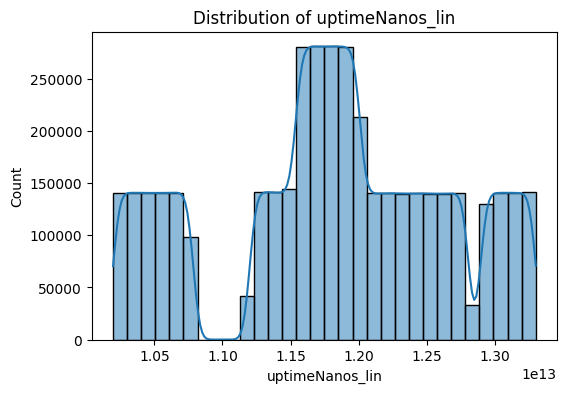

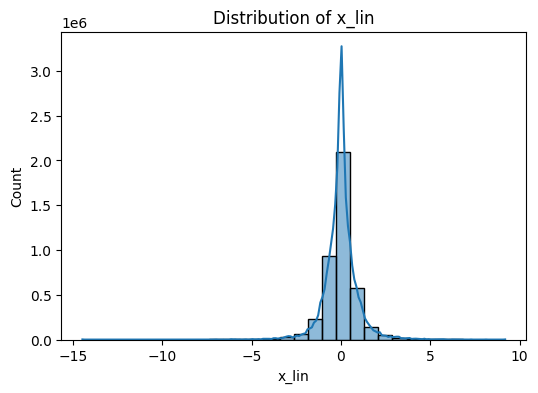

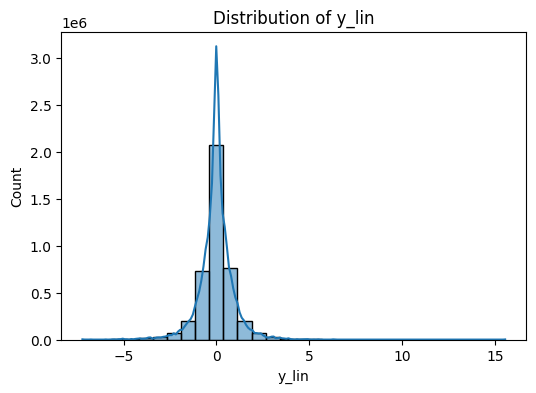

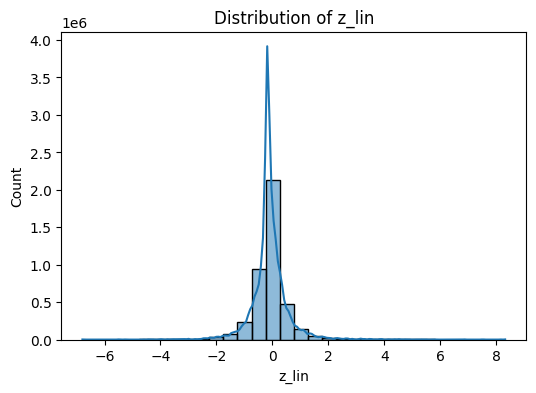

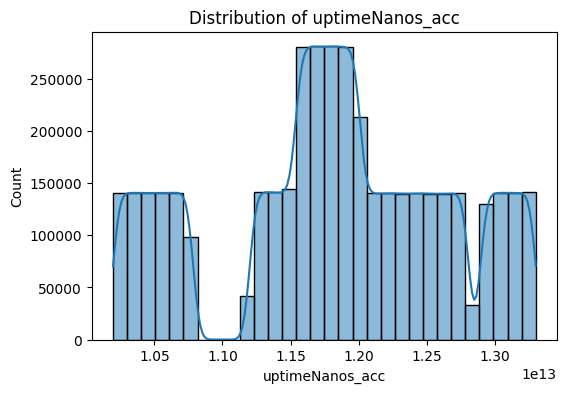

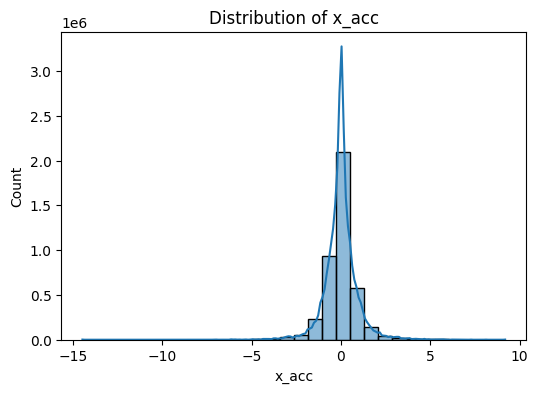

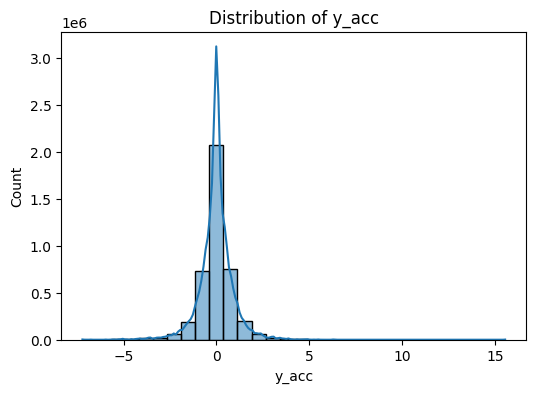

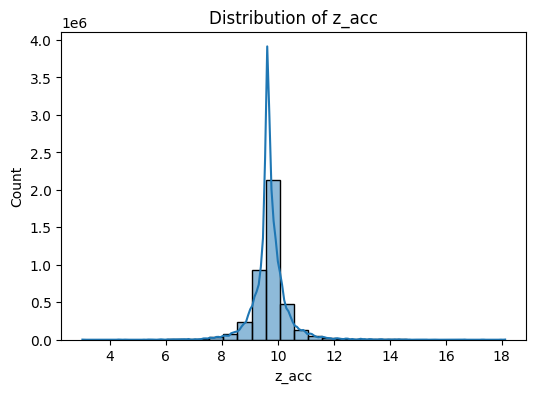

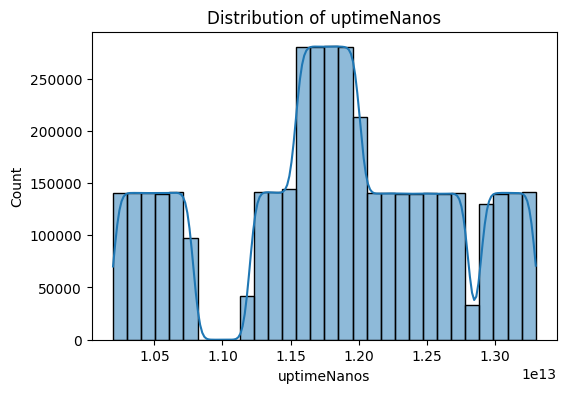

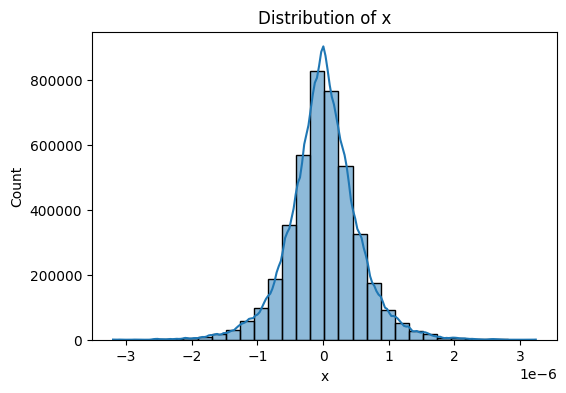

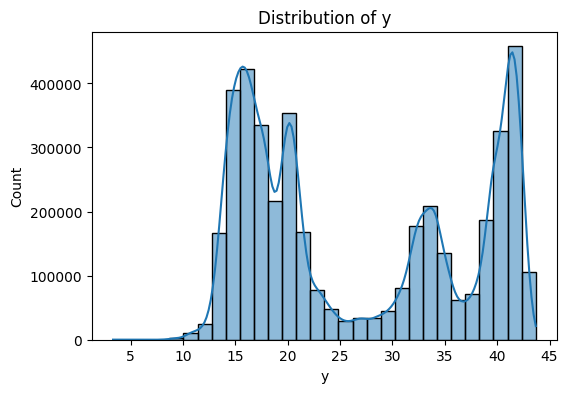

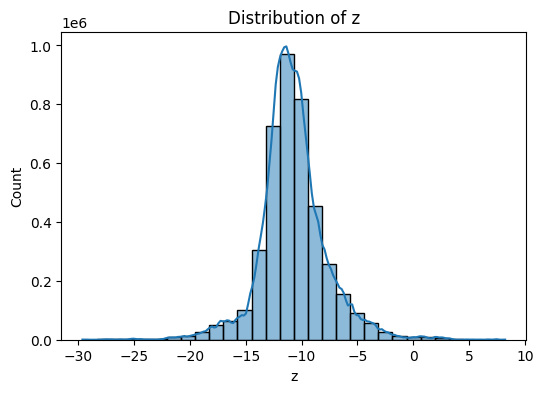

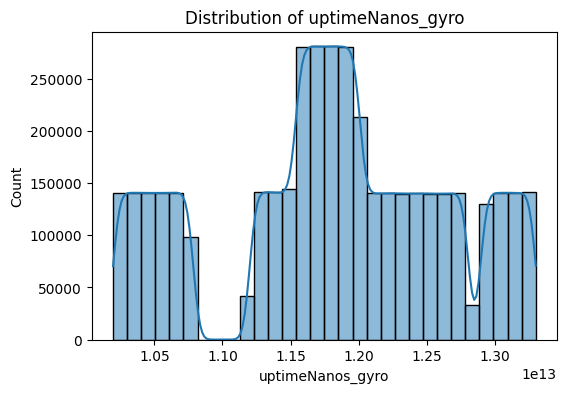

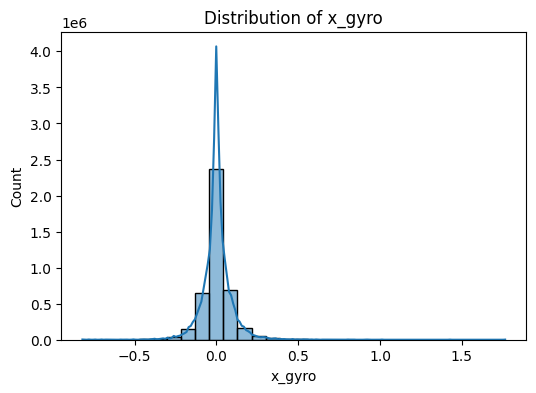

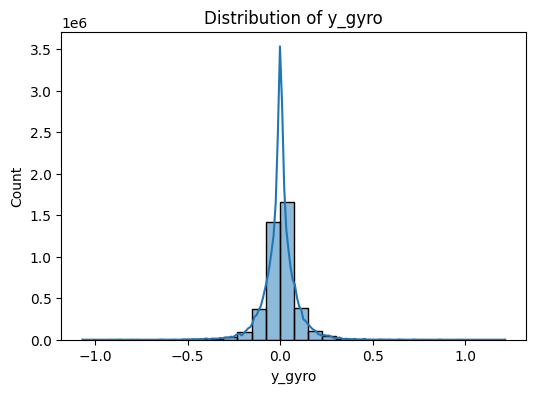

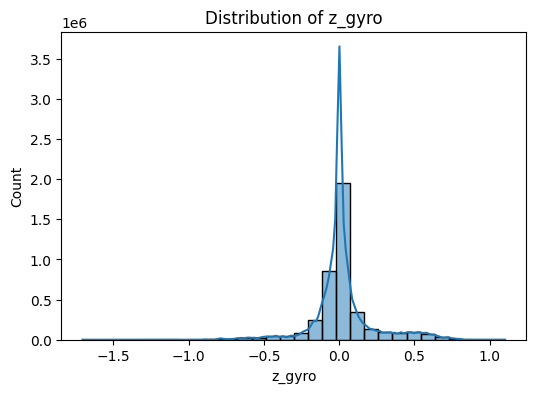

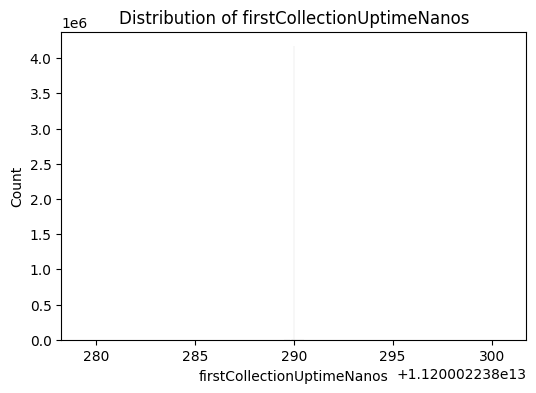

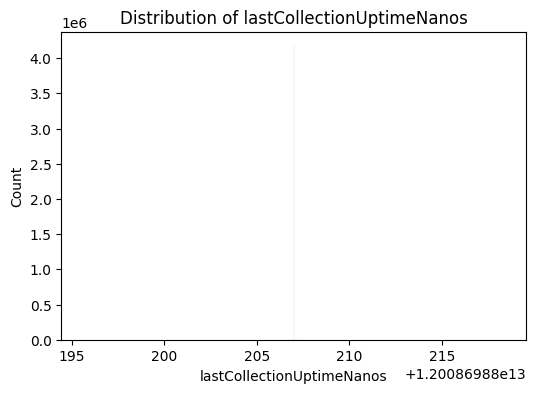

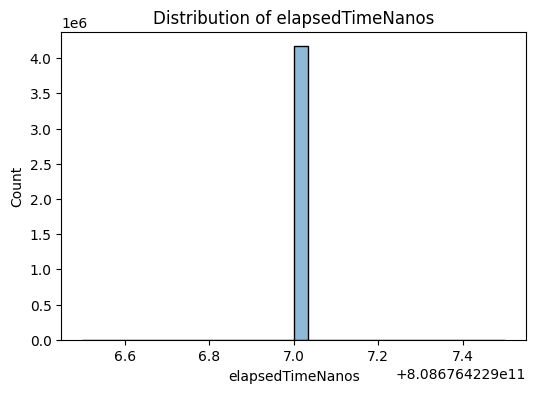

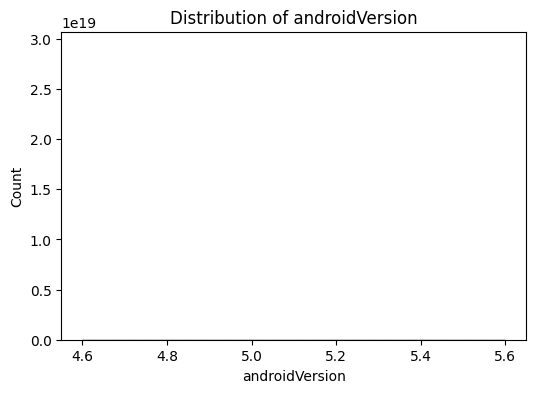

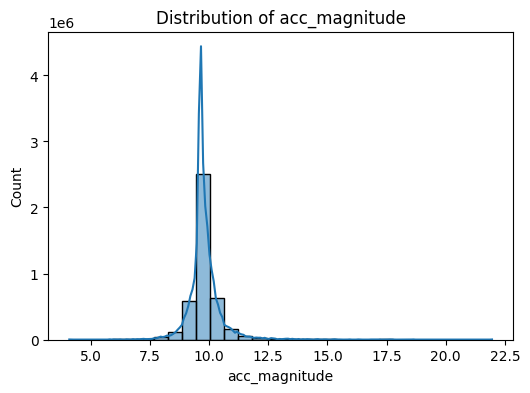

In [30]:
# For numeric columns

numeric_cols = df.select_dtypes(include=['number']).columns

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

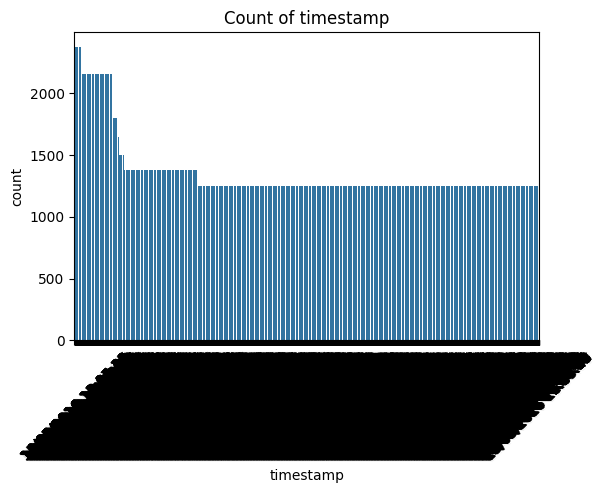

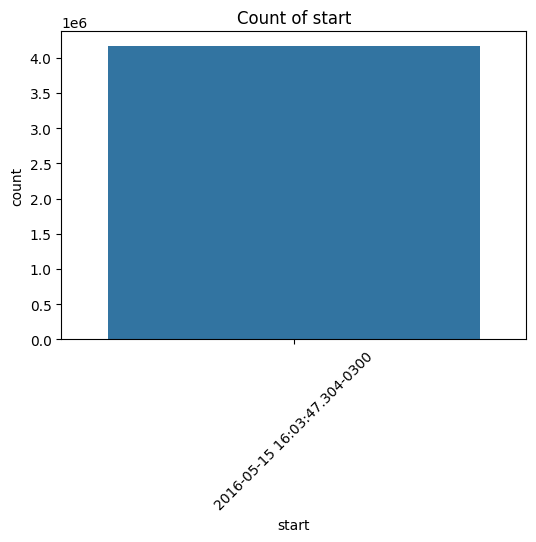

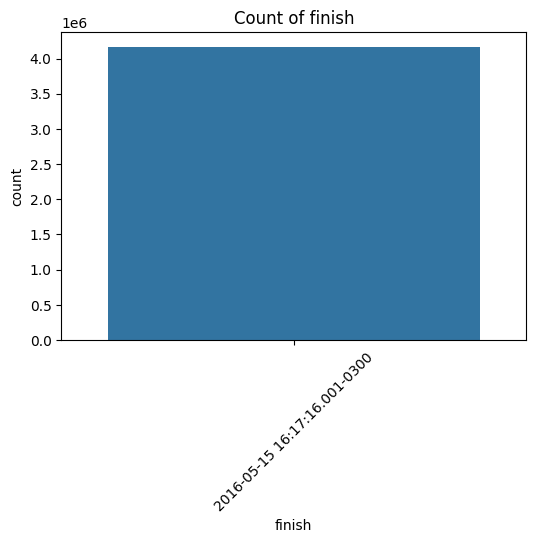

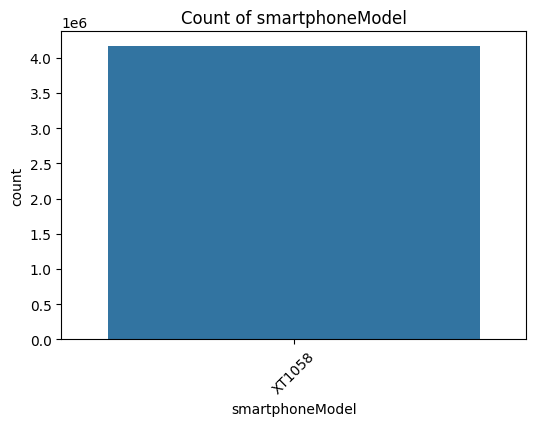

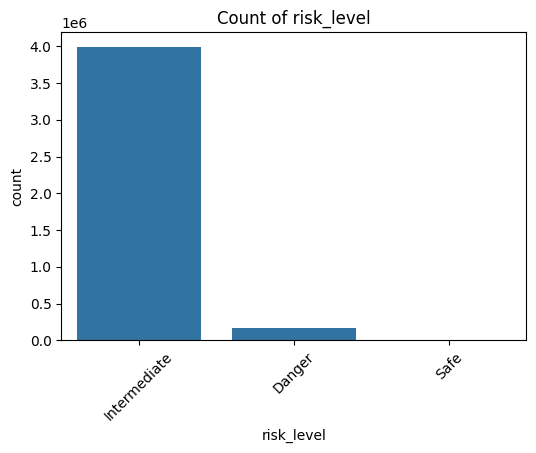

In [31]:
# For categorical columns

cat_cols = df.select_dtypes(exclude=['number']).columns

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Count of {col}")
    plt.xticks(rotation=45)
    plt.show()

# Bivariate Analysis (relationships between features)

C:\Users\Engr Mujeeb Akbar\anaconda3\envs\myenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


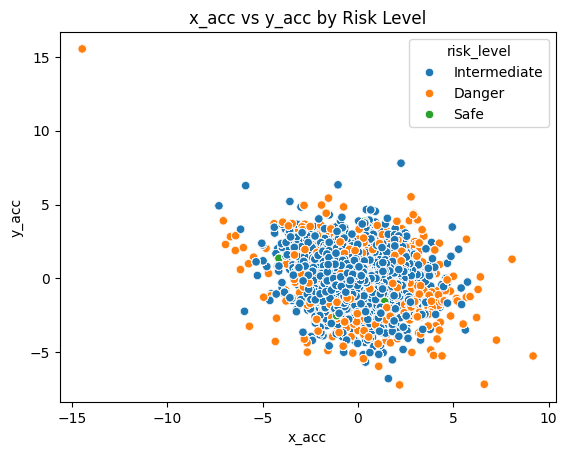

In [32]:
# Numerical vs Numerical == Scatter plots

sns.scatterplot(data=df, x="x_acc", y="y_acc", hue="risk_level")
plt.title("x_acc vs y_acc by Risk Level")
plt.show()

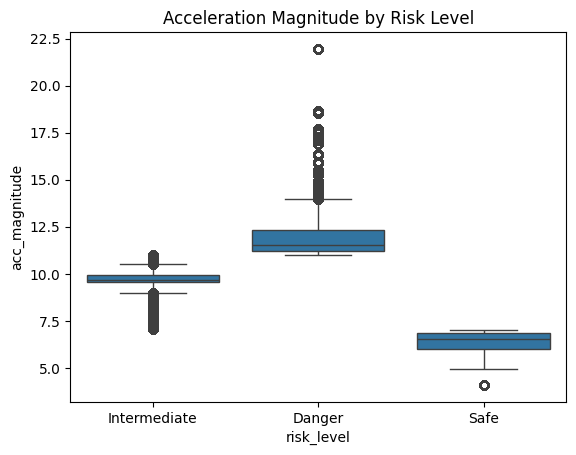

In [33]:
# Numerical vs Categorical == Boxplots

sns.boxplot(data=df, x="risk_level", y="acc_magnitude")
plt.title("Acceleration Magnitude by Risk Level")
plt.show()

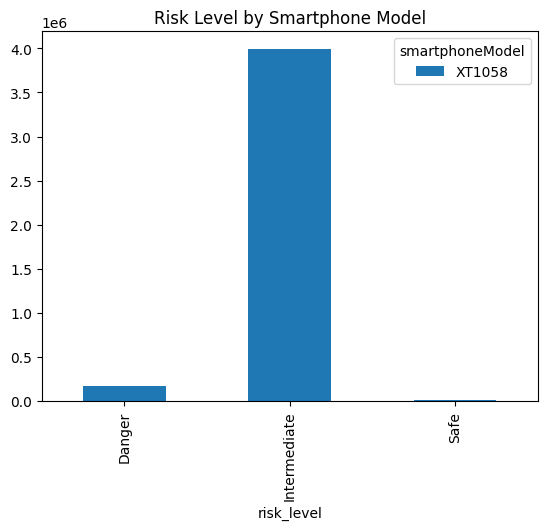

In [34]:
# Categorical vs Categorical == Heatmap of counts

pd.crosstab(df['risk_level'], df['smartphoneModel']).plot(kind='bar', stacked=True)
plt.title("Risk Level by Smartphone Model")
plt.show()

# Correlation Heatmap

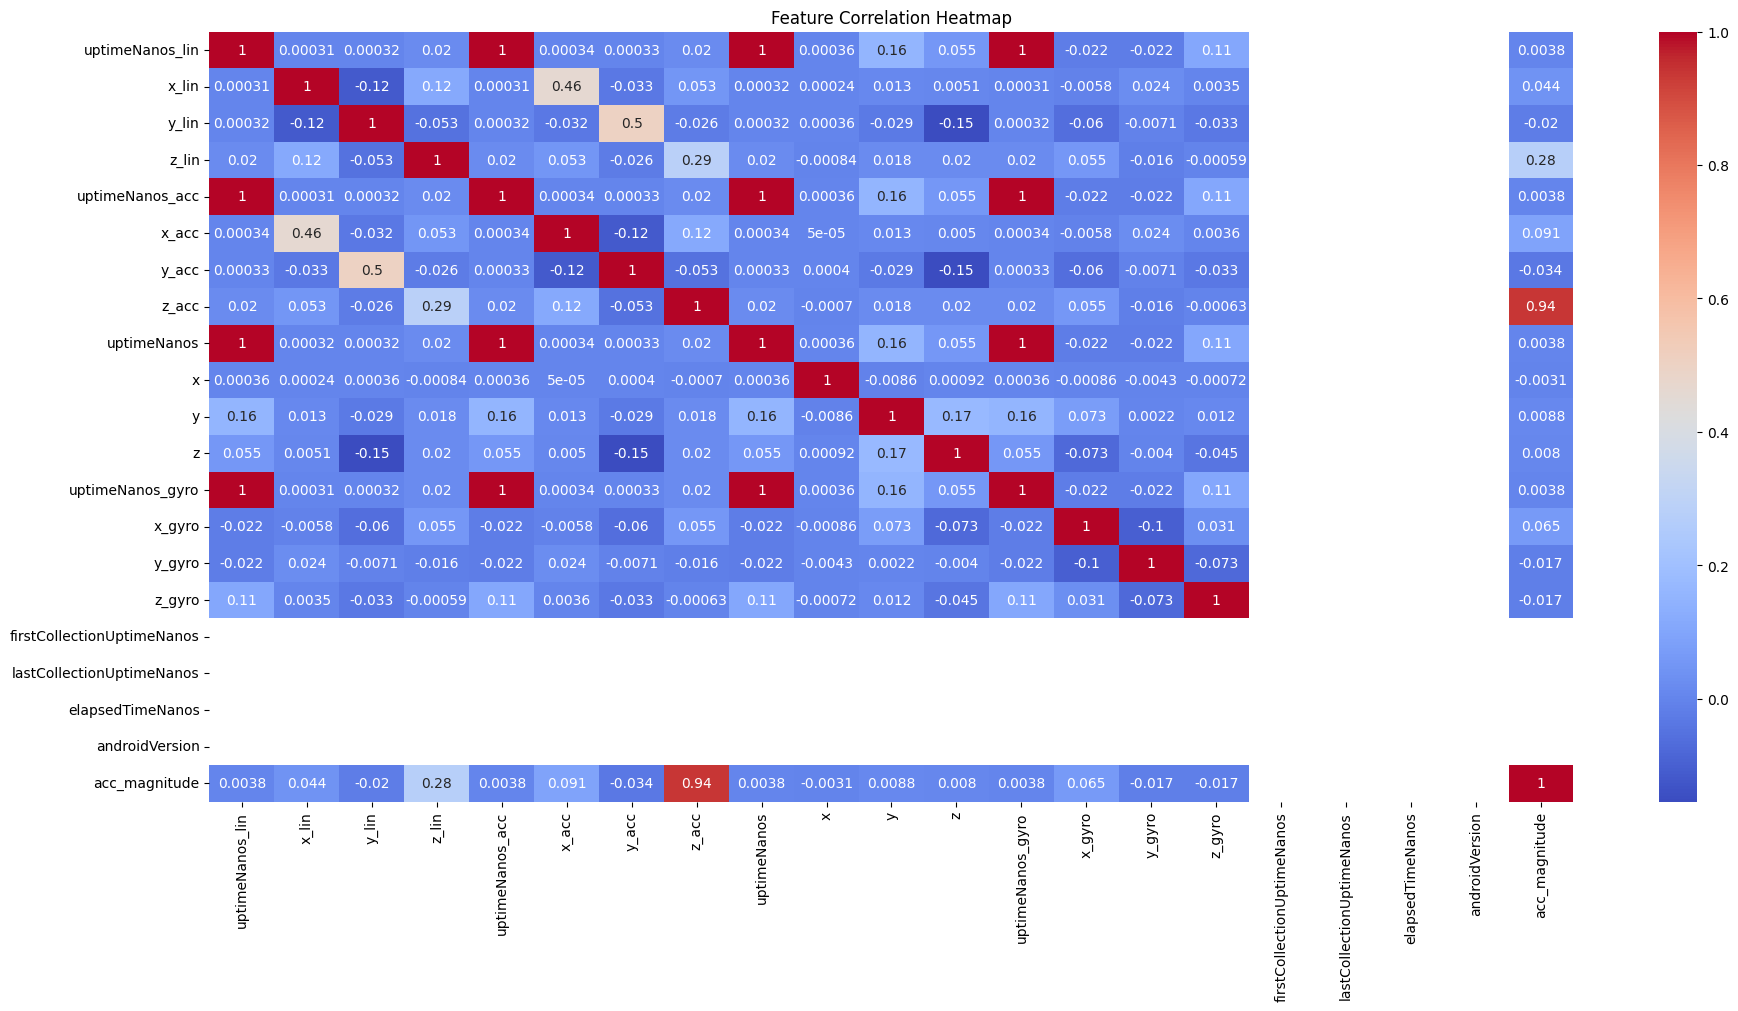

In [36]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation heatmap
plt.figure(figsize=(22, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Pairplot (safe for large data)
- A full pairplot on 1.8 GB will be extremely slow and possibly crash kernel. Instead, sample a subset

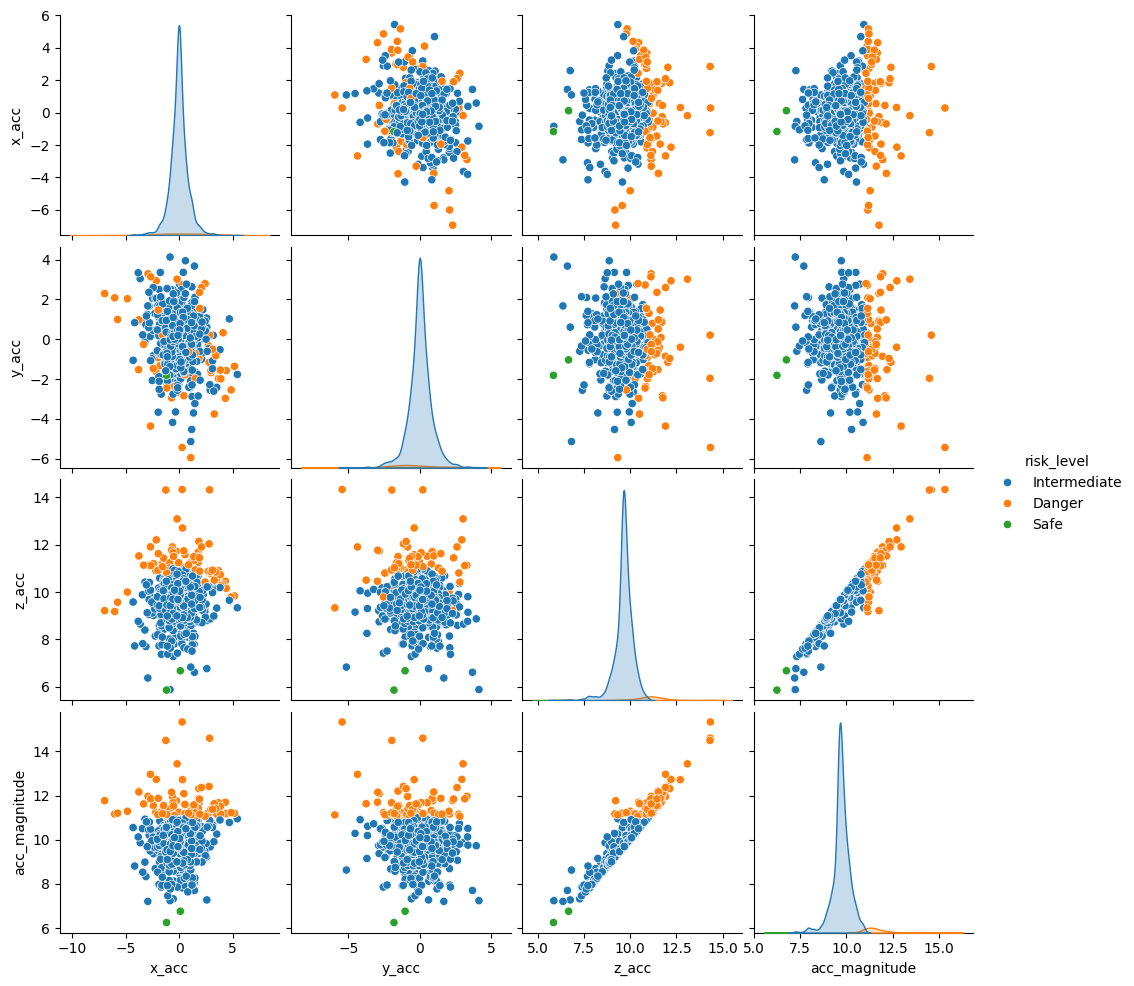

In [37]:
# Take a random sample for plotting
sample_df = df.sample(n=2000, random_state=42)

# Pairplot
sns.pairplot(sample_df[['x_acc', 'y_acc', 'z_acc', 'acc_magnitude', 'risk_level']], hue='risk_level')
plt.show()

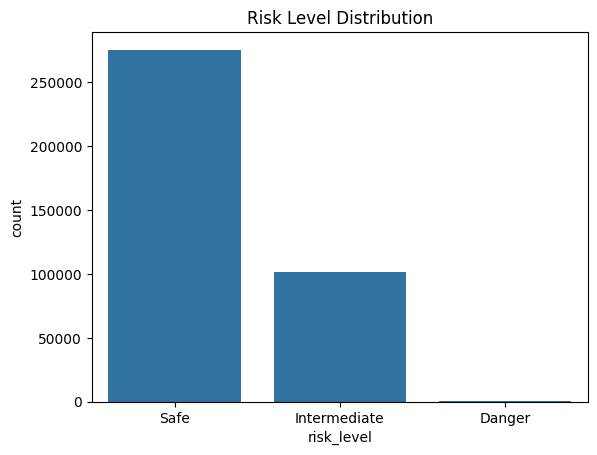

In [9]:
# Class Distribution Visualization

sns.countplot(x='risk_level', data=df)
plt.title("Risk Level Distribution")
plt.show()

# Convert timestamp to datetime

In [38]:
# Convert timestamp column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Sort by timestamp to ensure correct order
df.sort_values('timestamp', inplace=True)

C:\Users\Engr Mujeeb Akbar\AppData\Local\Temp\ipykernel_22468\1283470144.py:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')


# Plot acceleration magnitude over time

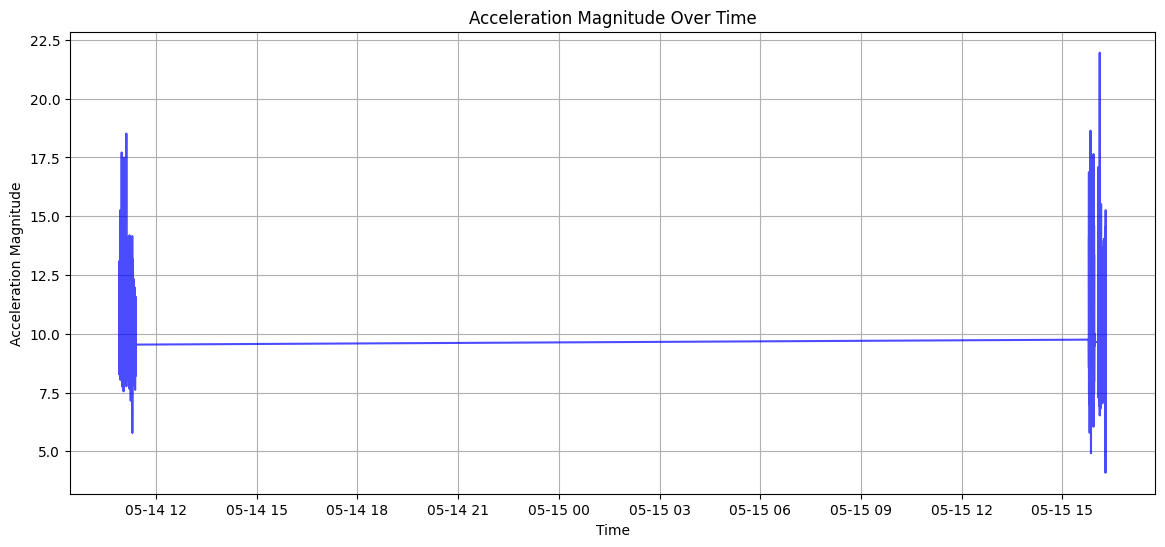

In [39]:
plt.figure(figsize=(14,6))
plt.plot(df['timestamp'], df['acc_magnitude'], color='blue', alpha=0.7)
plt.title("Acceleration Magnitude Over Time")
plt.xlabel("Time")
plt.ylabel("Acceleration Magnitude")
plt.grid(True)
plt.show()

# Risk level changes over time

C:\Users\Engr Mujeeb Akbar\anaconda3\envs\myenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


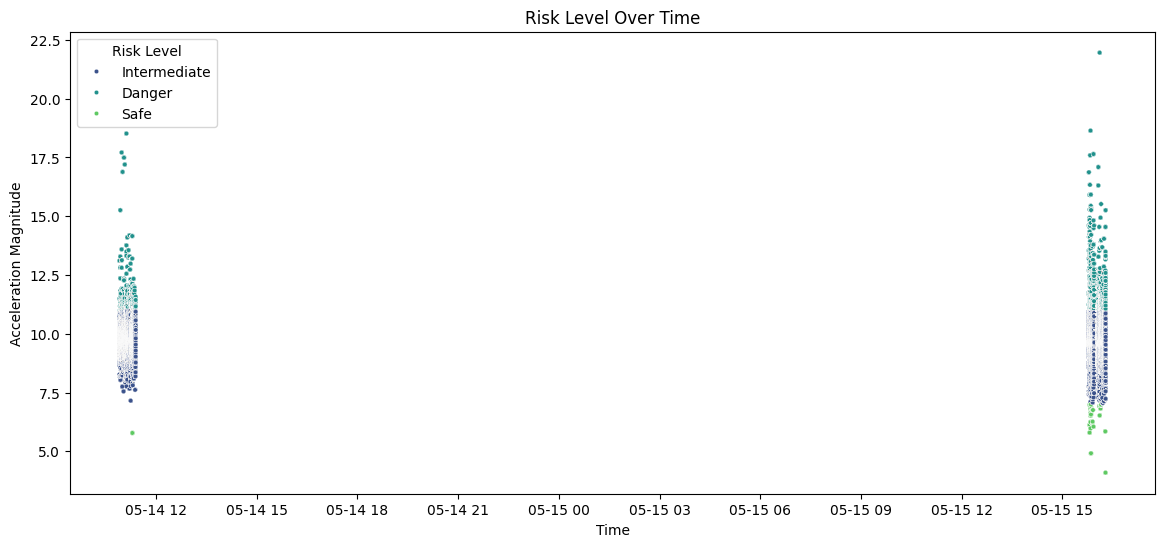

In [42]:
plt.figure(figsize=(14,6))
sns.scatterplot(data=df, x='timestamp', y='acc_magnitude', hue='risk_level', palette='viridis', s=10)
plt.title("Risk Level Over Time")
plt.xlabel("Time")
plt.ylabel("Acceleration Magnitude")
plt.legend(title="Risk Level")
plt.show()

# Multiple sensor readings over time (x_acc, y_acc, z_acc)

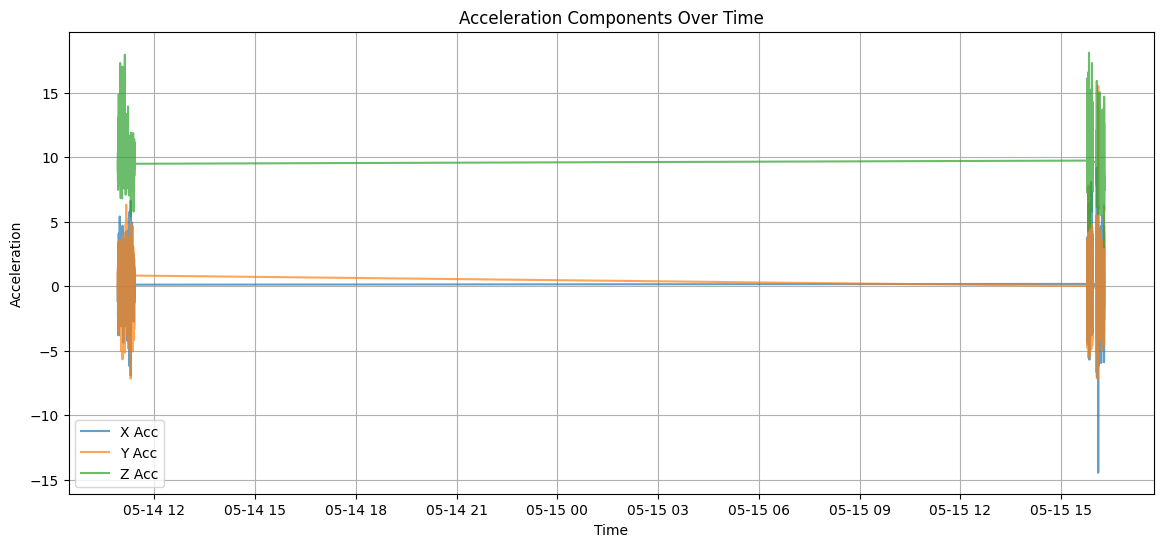

In [41]:
plt.figure(figsize=(14,6))
plt.plot(df['timestamp'], df['x_acc'], label='X Acc', alpha=0.7)
plt.plot(df['timestamp'], df['y_acc'], label='Y Acc', alpha=0.7)
plt.plot(df['timestamp'], df['z_acc'], label='Z Acc', alpha=0.7)
plt.title("Acceleration Components Over Time")
plt.xlabel("Time")
plt.ylabel("Acceleration")
plt.legend()
plt.grid(True)
plt.show()

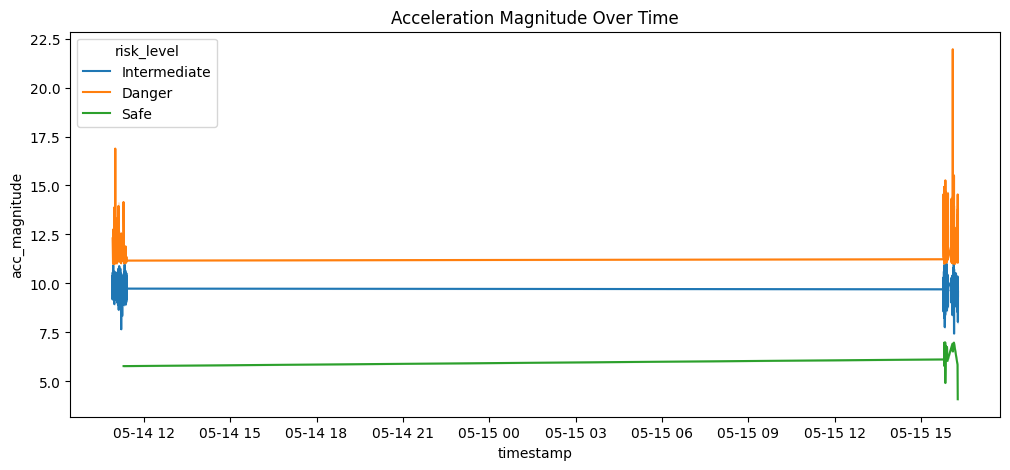

In [43]:
# Time Series Patterns
# I want to see how acc_magnitude changes over time

df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

plt.figure(figsize=(12,5))
sns.lineplot(x='timestamp', y='acc_magnitude', hue='risk_level', data=df)
plt.title("Acceleration Magnitude Over Time")
plt.show()

- timestamp → time reference, used for time-series analysis, not distribution histograms.
- uptimeNanos_*, start, finish, firstCollectionUptimeNanos, etc. → mostly system or experiment logging details.
- smartphoneModel, androidVersion → categorical info, not useful for numeric

# Exploratory Data Analysis Summary
## Dataset Overview

- Source: sensors_with_risk_2.csv (unzipped from provided data)
- Shape: 416,777 rows × 26 columns
- Features: Sensor readings (linear acceleration, accelerometer, gyroscope), timestamps, device info, and engineered features (acc_magnitude, risk_level).
- Target Variable: risk_level — classified into Safe, Intermediate, and Danger based on acceleration magnitude thresholds.

## Univariate Analysis

- Numerical Features: Histograms and distribution plots showed most accelerometer (x_acc, y_acc, z_acc) and gyroscope (x_gyro, y_gyro, z_gyro) values cluster near zero, with occasional spikes indicating movement events.
- Engineered Feature acc_magnitude: Ranges from ~4.09 to ~21.95, with Safe readings being most frequent.
- Categorical Feature risk_level: Imbalanced — majority of samples fall into Safe, followed by Intermediate, and least in Danger.

## Bivariate Analysis

- Boxplots & Violin Plots: Showed how acc_magnitude distribution changes across risk_level — median values clearly increase from Safe → Intermediate → Danger.
- Scatter Plots: Some separation between classes, but overlaps exist, especially between Safe and Intermediate ranges.

## Correlation Analysis

**Heatmap (Numeric Features):**
- Strong correlation between accelerometer axes and acc_magnitude.
- Gyroscope readings show weaker correlation with acc_magnitude.
- Minimal correlation between linear acceleration (x_lin, y_lin, z_lin) and gyroscope features.

## Pairwise Relationships

- Pairplots for selected features (x_acc, y_acc, z_acc, acc_magnitude, risk_level) confirmed clustering patterns but also highlighted class overlaps, suggesting a non-linear decision boundary.

## Time Series Analysis

- Sensor readings plotted over time reveal periodic fluctuations, likely corresponding to motion activities.
- Spikes in acc_magnitude align with Intermediate or Danger risk levels, while steady readings correspond to Safe periods.

## Key Insights

- acc_magnitude is a strong predictor for risk_level.
- The dataset is imbalanced — Safe dominates; techniques like oversampling/undersampling may be needed before model training.
- Some correlation exists among accelerometer axes, which may allow dimensionality reduction (e.g., PCA) if needed.
- Potential for temporal pattern modeling (e.g., RNN/LSTM) due to time-series nature.